In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

bank_df=pd.read_csv('bank-full.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# look at data statistics
bank_df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,14,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [5]:
# create backup of data
original = bank_df.copy()

In [6]:
bank_df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [7]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
type(bank_df.loan.dtype) 

numpy.dtype

In [9]:
# Creating  functions find data type while performing visualisation

def find_dtype(feature):
    print(feature.dtype)
    if str(feature.dtype) in 'object':
        return 'categorical'
    else:
        return 'continuous'
        

In [10]:
def univariate(feature, stats=True):
    
    if find_dtype(feature) == 'continuous':
        sns.distplot(feature)
        if stats == True:
            print(feature.describe())
    
    elif find_dtype(feature) == 'categorical':
        ax=sns.countplot(feature)
#         ax = sns.countplot(x="C)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.tight_layout()
        plt.show()
        if stats == True:
            print(feature.value_counts())
            
    else:
        print("Invalid feature passed: pass a numeric feature or a categorical feature.")

In [11]:
def bivariate(f1, f2):
    if find_dtype(f1) == 'continuous' and find_dtype(f2) == 'continuous':
        sns.regplot(f1, f2)
    elif (find_dtype(f1) == 'categorical' and find_dtype(f2) == 'continuous') or (find_dtype(f1) == 'continuous' and find_dtype(f2) == 'categorical'):        
        sns.boxplot(f1, f2)

## Univariate EDA

int64
count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


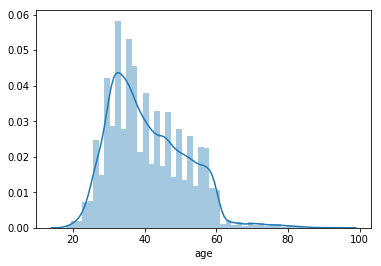

In [12]:
univariate(bank_df.age)

object
object


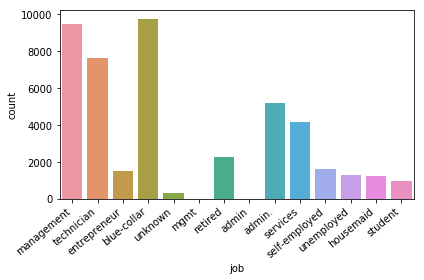

blue-collar      9732
management       9456
technician       7597
admin.           5169
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
mgmt                2
admin               2
Name: job, dtype: int64


In [13]:
univariate(bank_df.job)

object
object


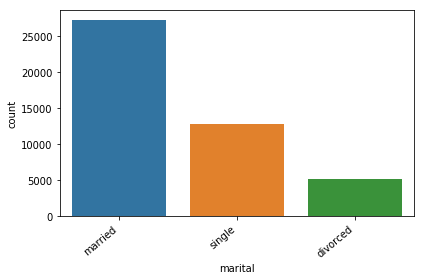

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


In [14]:
univariate(bank_df.marital)

int64
count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


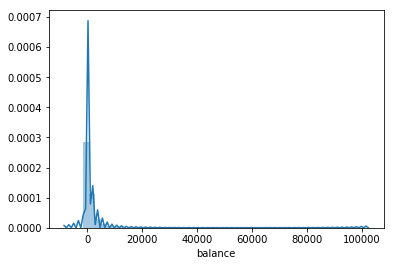

In [15]:
univariate(bank_df.balance)

object
object


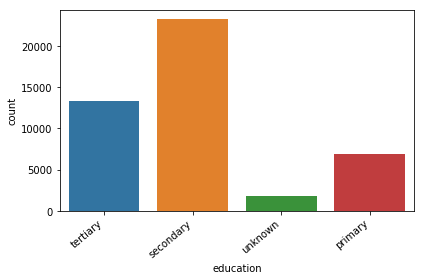

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


In [16]:
univariate(bank_df.education)

object
object


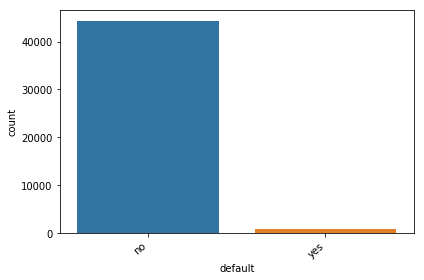

no     44396
yes      815
Name: default, dtype: int64


In [17]:

univariate(bank_df.default)

object
object


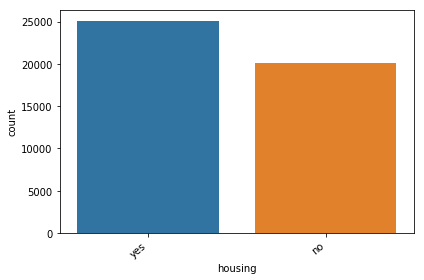

yes    25130
no     20081
Name: housing, dtype: int64


In [18]:
univariate(bank_df.housing)

object
object


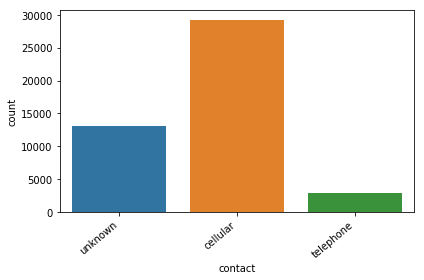

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


In [19]:
univariate(bank_df.contact)

int64
count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64


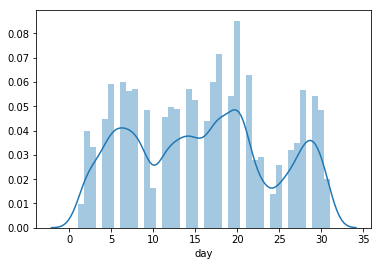

In [20]:
univariate(bank_df.day)

object
object


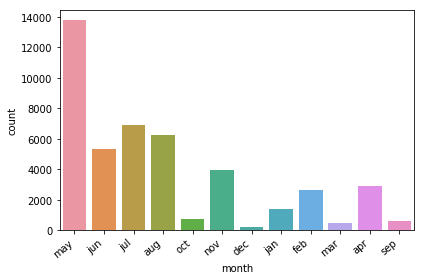

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


In [21]:
univariate(bank_df.month)

int64
count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


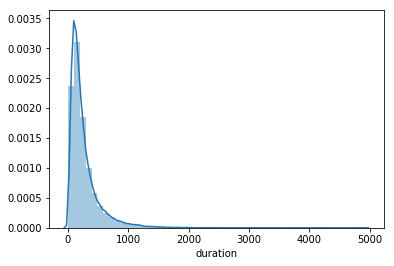

In [22]:
univariate(bank_df.duration)

int64
count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


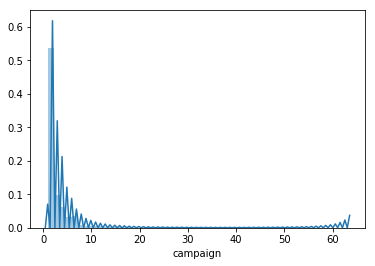

In [23]:
univariate(bank_df.campaign)

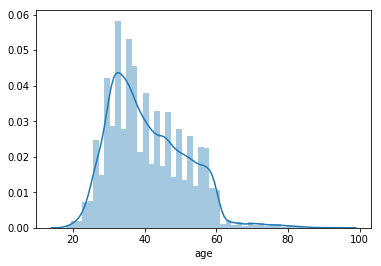

In [24]:
sns.distplot(bank_df.age)


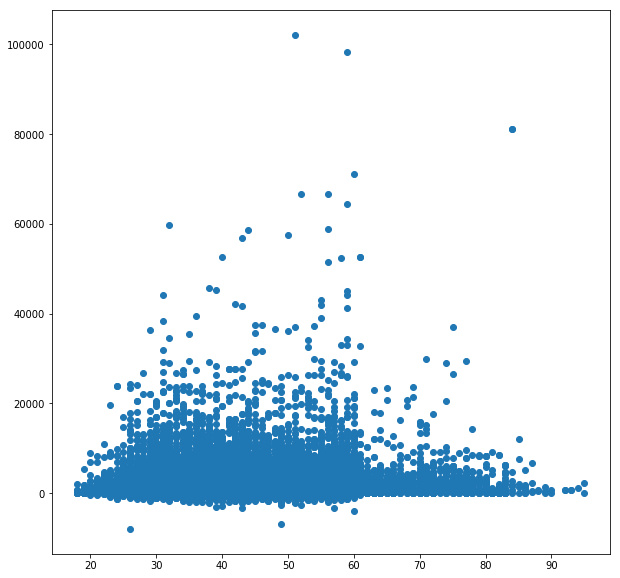

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(data=bank_df,x='age',y='balance')

In [26]:
a=list(bank_df[bank_df.age>70].index)

In [27]:
bank_df.loc[a,'balance']=0

In [28]:
bank_df.values

array([[58, 'management', 'married', ..., 0, 'unknown', 'no'],
       [44, 'technician', 'single', ..., 0, 'unknown', 'no'],
       [33, 'entrepreneur', 'married', ..., 0, 'unknown', 'no'],
       ...,
       [72, 'retired', 'married', ..., 3, 'success', 'yes'],
       [57, 'blue-collar', 'married', ..., 0, 'unknown', 'no'],
       [37, 'entrepreneur', 'married', ..., 11, 'other', 'no']],
      dtype=object)

int64
count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


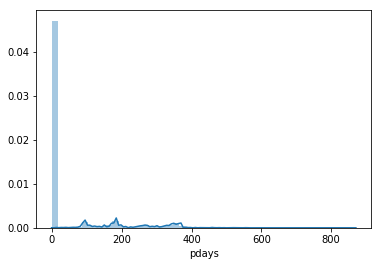

In [29]:
univariate(bank_df.pdays)

int64
count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64


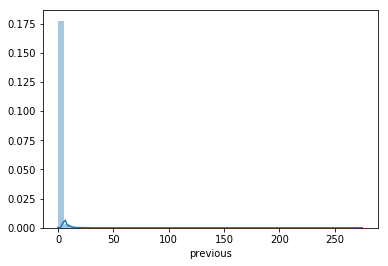

In [30]:
univariate(bank_df.previous)

object
object


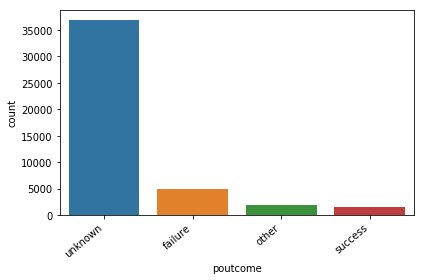

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


In [31]:
univariate(bank_df.poutcome)

object
object


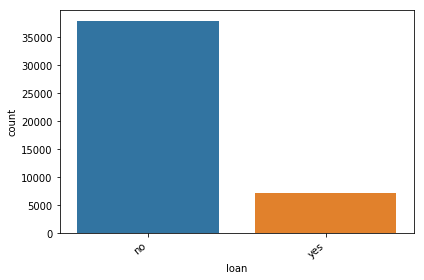

no     37967
yes     7244
Name: loan, dtype: int64


In [32]:
univariate(bank_df.loan)

object
object


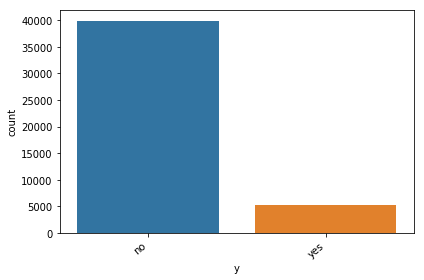

no     39922
yes     5289
Name: y, dtype: int64


In [33]:
univariate(bank_df.y)

int64
count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


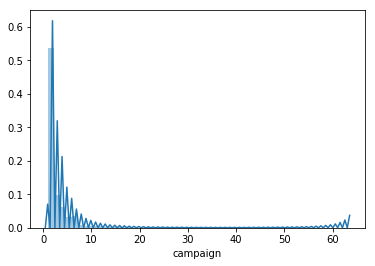

In [34]:
univariate(bank_df.campaign)

Text(0,0.5,'Probability Density')

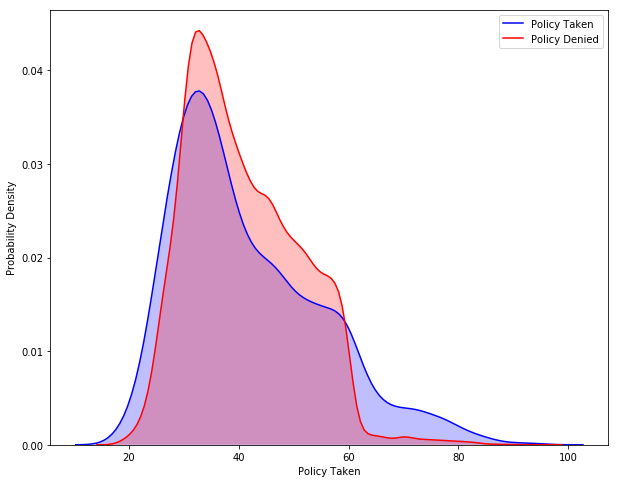

In [35]:
plt.figure(figsize = (10, 8))

# Plotting the KDE Plot 
sns.kdeplot(bank_df.loc[(bank_df['y']=='yes'), 
            'age'], color='b', shade=True, Label='Policy Taken') 
sns.kdeplot(bank_df.loc[(bank_df['y']=='no'), 
            'age'], color='r', shade=True, Label='Policy Denied') 
  
# Setting the X and Y Label 
plt.xlabel('Policy Taken') 
plt.ylabel('Probability Density')

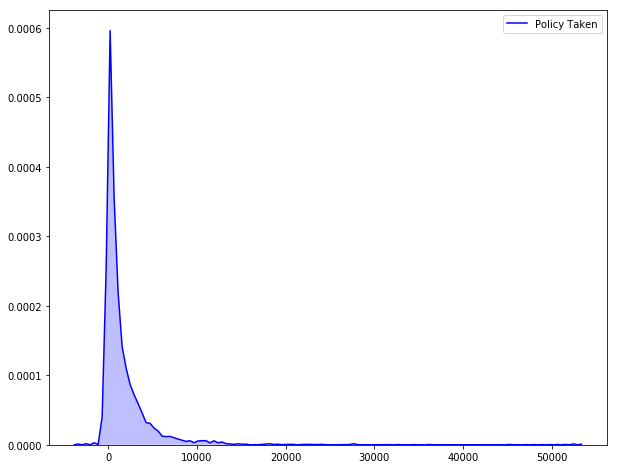

In [36]:
plt.figure(figsize = (10, 8))

# Plotting the KDE Plot 
sns.kdeplot(bank_df.loc[(bank_df['y']=='yes'), 
            'balance'], color='b', shade=True, Label='Policy Taken') 


Text(0,0.5,'Probability Density')

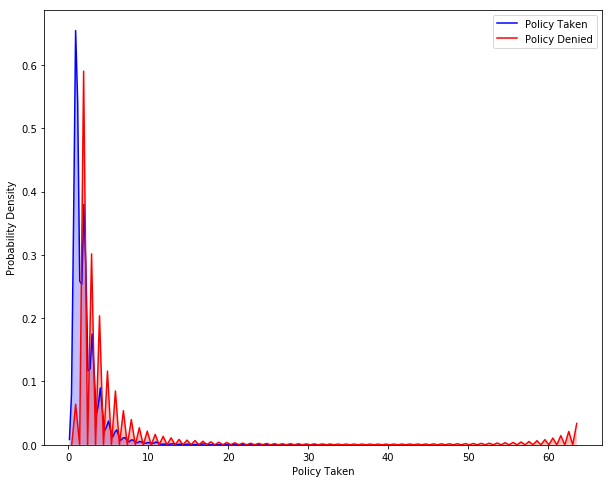

In [37]:
plt.figure(figsize = (10, 8))

# Plotting the KDE Plot 
sns.kdeplot(bank_df.loc[(bank_df['y']=='yes'), 
            'campaign'], color='b', shade=True, Label='Policy Taken') 
sns.kdeplot(bank_df.loc[(bank_df['y']=='no'), 
            'campaign'], color='r', shade=True, Label='Policy Denied') 
  
# Setting the X and Y Label 
plt.xlabel('Policy Taken') 
plt.ylabel('Probability Density')

Text(0,0.5,'Probability Density')

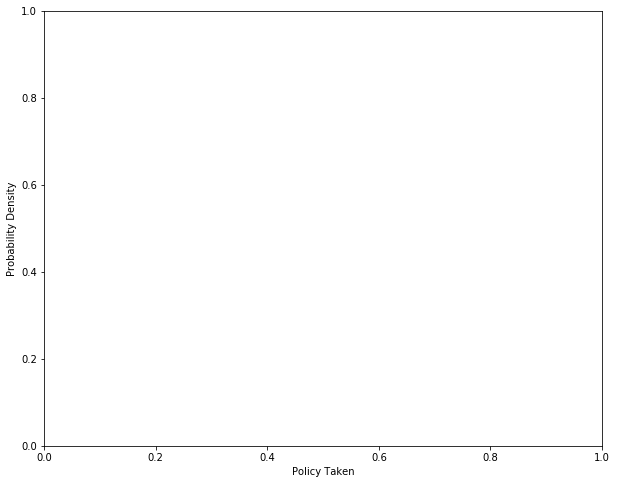

In [89]:
plt.figure(figsize = (10, 8))

# Plotting the KDE Plot 
sns.kdeplot(bank_df.loc[(bank_df['y']=='yes'), 
            'balance'], color='b', shade=True, Label='Policy Taken') 
sns.kdeplot(bank_df.loc[(bank_df['y']=='no'), 
            'balance'], color='r', shade=True, Label='Policy Denied') 
  
# Setting the X and Y Label 
plt.xlabel('Policy Taken') 
plt.ylabel('Probability Density')

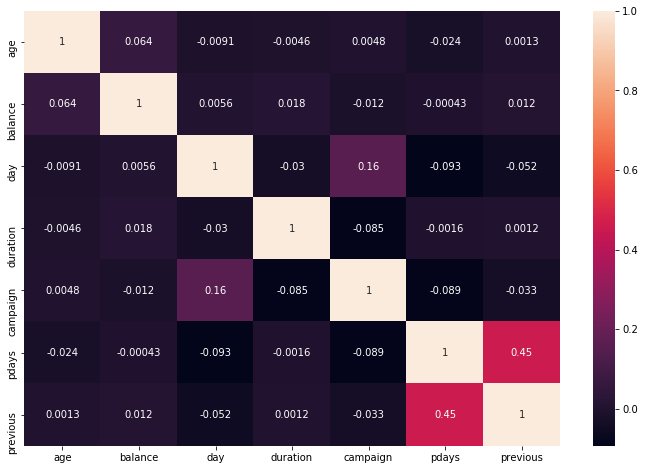

In [39]:
plt.figure(figsize=(12, 8))

corr = bank_df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

In [40]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import preprocessing


### Transforming all the object  data type to numerical form as most ml take numerical variables for training

There are various method to transform categorical values to numeric

1.Label encoding 
2.Dummies
3.you can map datas manually too

I will choose label encoder as well as dummies .Problem with label encoding is that it can give order to unordered categorical ,I will choose the methods according to variable types

In [41]:
cat_list=[]
for val in bank_df.columns:
#     print(val)
    if str(bank_df[val].dtype) in 'object':
        cat_list.append(val)
    

In [42]:
cat_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [43]:
bank_df.job.value_counts()

blue-collar      9732
management       9456
technician       7597
admin.           5169
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
mgmt                2
admin               2
Name: job, dtype: int64

In [44]:
bank_df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [45]:
bank_df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [46]:
bank_df.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [47]:
bank_df.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [48]:
bank_df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [49]:
bank_df.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [50]:
bank_df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

#### Label encode job and education and for rest I will create dummies


In [51]:
le = preprocessing.LabelEncoder()

In [52]:
le.fit(bank_df[['education']])

LabelEncoder()

In [53]:
bank_df.education=le.transform(bank_df['education'])

In [54]:
le.fit(bank_df[['job']])

LabelEncoder()

In [55]:
bank_df.job=le.transform(bank_df['job'])

In [56]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,5,married,2,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,11,single,1,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,3,married,1,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,2,married,3,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,13,single,3,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### creating dummies

In [57]:
bank_df=pd.get_dummies(data=bank_df,columns=['marital','contact'],drop_first=True,prefix=['marital_','contact_'])

In [58]:
bank_df=pd.get_dummies(data=bank_df,columns=['poutcome'],drop_first=True,prefix=['poutcome_'])

In [59]:
bank_df.default=bank_df.default.map({'yes':1,'no':0})
bank_df.loan=bank_df.loan.map({'yes':1,'no':0})
bank_df.housing=bank_df.housing.map({'yes':1,'no':0})

In [60]:
bank_df.y=bank_df.y.map({'yes':1,'no':0})

In [61]:
bank_df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,pdays,previous,y,marital__married,marital__single,contact__telephone,contact__unknown,poutcome__other,poutcome__success,poutcome__unknown
0,58,5,2,0,2143,1,0,5,may,261,...,-1,0,0,1,0,0,1,0,0,1
1,44,11,1,0,29,1,0,5,may,151,...,-1,0,0,0,1,0,1,0,0,1
2,33,3,1,0,2,1,1,5,may,76,...,-1,0,0,1,0,0,1,0,0,1
3,47,2,3,0,1506,1,0,5,may,92,...,-1,0,0,1,0,0,1,0,0,1
4,33,13,3,0,1,0,0,5,may,198,...,-1,0,0,0,1,0,1,0,0,1


In [62]:
bank_df.month=bank_df.month.map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [63]:
bank_df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,pdays,previous,y,marital__married,marital__single,contact__telephone,contact__unknown,poutcome__other,poutcome__success,poutcome__unknown
0,58,5,2,0,2143,1,0,5,5,261,...,-1,0,0,1,0,0,1,0,0,1
1,44,11,1,0,29,1,0,5,5,151,...,-1,0,0,0,1,0,1,0,0,1
2,33,3,1,0,2,1,1,5,5,76,...,-1,0,0,1,0,0,1,0,0,1
3,47,2,3,0,1506,1,0,5,5,92,...,-1,0,0,1,0,0,1,0,0,1
4,33,13,3,0,1,0,0,5,5,198,...,-1,0,0,0,1,0,1,0,0,1


In [64]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
age                   45211 non-null int64
job                   45211 non-null int32
education             45211 non-null int32
default               45211 non-null int64
balance               45211 non-null int64
housing               45211 non-null int64
loan                  45211 non-null int64
day                   45211 non-null int64
month                 45211 non-null int64
duration              45211 non-null int64
campaign              45211 non-null int64
pdays                 45211 non-null int64
previous              45211 non-null int64
y                     45211 non-null int64
marital__married      45211 non-null uint8
marital__single       45211 non-null uint8
contact__telephone    45211 non-null uint8
contact__unknown      45211 non-null uint8
poutcome__other       45211 non-null uint8
poutcome__success     45211 non-null uint8
poutcome__unknown     45211 non

## Splitting the data into two parts train and test

In [65]:
# divide data into train and test
X = bank_df.drop("y", axis = 1)
y = bank_df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [66]:
# Stratified K-fold

from sklearn.model_selection import StratifiedKFold


In [67]:
X_train.reset_index(inplace=True)


In [68]:
type(y_train)

pandas.core.series.Series

In [69]:
skf=StratifiedKFold(n_splits=3)

In [70]:
pwd

'C:\\Users\\Mohit Ranjan\\Desktop\\Yugen'

In [71]:
for tr,val in skf.split(X_train,y_train):
    i=1
#     str_df+str(i)=pd.DataFrame()
    X_tr,X_val=X_train.iloc[tr],X_train.iloc[val]
    y_tr,y_val=y_train.iloc[tr],y_train.iloc[val]
    
    X_tr.to_csv('D:\\Interview_prep\\Yugen'+'X_tr'+str(i))
    y_tr.to_csv('D:\\Interview_prep\\Yugen'+'y_tr'+str(i))
    
    

In [72]:
X_sk=pd.read_csv('D:\Interview_prep\YugenX_tr1.csv')
y_sk=pd.read_csv('D:\Interview_prep\Yugeny_tr1.csv')

In [73]:
X_str_final=pd.concat([X_sk,y_sk],axis=1)

# Outlier Detection 

## Cap outlier using k-sigma technique
Those values which are not under three standard distribution will be removed 

In [74]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [75]:
# # example of capping
# sample_array = list(range(100))
# # sample_array
# # # add outliers to the data
# sample_array[0] = -9999
# sample_array[99] = 9999
# # # cap outliers
# sample_array = np.array(sample_array)
# print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

In [76]:
numFeat_list=['age','balance','campaign',]

In [77]:
# cap outliers in the numeric columns
X[numFeat_list] = X[numFeat_list].apply(cap_outliers, axis=0)

In [78]:
X.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,marital__married,marital__single,contact__telephone,contact__unknown,poutcome__other,poutcome__success,poutcome__unknown
0,58.0,5,2,0,2143.0,1,0,5,5,261,1.0,-1,0,1,0,0,1,0,0,1
1,44.0,11,1,0,29.0,1,0,5,5,151,1.0,-1,0,0,1,0,1,0,0,1
2,33.0,3,1,0,2.0,1,1,5,5,76,1.0,-1,0,1,0,0,1,0,0,1
3,47.0,2,3,0,1506.0,1,0,5,5,92,1.0,-1,0,1,0,0,1,0,0,1
4,33.0,13,3,0,1.0,0,0,5,5,198,1.0,-1,0,0,1,0,1,0,0,1


## PCA

In [79]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [80]:
pca.fit(X_train)
policy_mkt_pca = pca.fit_transform(X_train)

In [81]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      16.06
1      26.12
2      34.65
3      40.55
4      45.95
5      51.11
6      55.92
7      60.71
8      65.26
9      69.78
10     74.09
11     78.22
12     82.18
13     86.02
14     89.77
15     92.77
16     95.34
17     97.63
18     98.63
19     99.53
20    100.00
dtype: float64


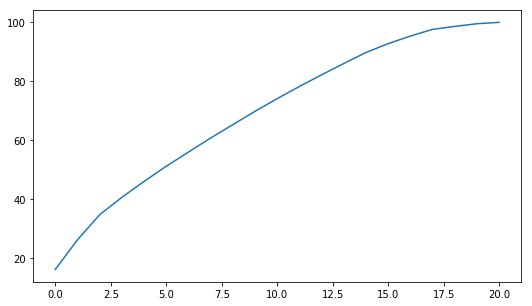

In [82]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20))
plt.plot(cumulative_variance)

In [83]:
cumulative_variance

array([ 16.0571,  26.1232,  34.6478,  40.5461,  45.9539,  51.1091,
        55.9225,  60.7054,  65.2596,  69.7772,  74.086 ,  78.2241,
        82.1759,  86.02  ,  89.773 ,  92.7659,  95.3432,  97.6266,
        98.6279,  99.5317, 100.    ])

## PCA with logistic regression

In [84]:
# create pipeline
PCA_VARS = 16
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [85]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8375014745782706

In [86]:
X_test

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,marital__married,marital__single,contact__telephone,contact__unknown,poutcome__other,poutcome__success,poutcome__unknown
35263,47,5,2,0,714,1,0,7,5,609,1,-1,0,0,1,0,0,0,0,1
38959,28,9,1,0,290,1,0,18,5,128,1,-1,0,0,1,0,0,0,0,1
13663,60,7,0,0,1017,0,0,9,7,10,20,-1,0,0,0,0,1,0,0,1
9848,57,2,1,0,5553,0,1,9,6,589,1,-1,0,1,0,0,1,0,0,1
24495,41,5,0,0,5310,1,0,17,11,984,1,-1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36506,41,2,1,0,-648,1,0,12,5,104,3,172,2,1,0,0,0,0,0,0
9883,42,4,1,0,314,0,0,9,6,249,2,-1,0,0,0,0,1,0,0,1
26457,30,11,2,0,3086,1,0,20,11,150,1,-1,0,0,1,0,0,0,0,1
10780,50,7,0,0,1098,0,0,17,6,168,1,-1,0,1,0,0,1,0,0,1


In [88]:
# predict conversion on test data
y_pred = pipeline.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

ValueError: operands could not be broadcast together with shapes (11303,20) (21,) (11303,20) 

## Hyperparameter tuning -PCA + Logistic Regression

In [ ]:
# class imbalance
y_train.value_counts()/y_train.shape

In [ ]:
.883/.116

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf=StratifiedKFold(n_splits=3)

In [ ]:
skf.get_n_splits()

In [ ]:
X.head()

In [ ]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [15, 20], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
model.fit(X_train, y_train)

In [ ]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

In [ ]:
# predict conversion  on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

## Extract the intercept and the coefficients from the logistic model

In [ ]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [ ]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [ ]:
# coefficients
coefficients = logistic_model.coef_.reshape((20, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [ ]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

In [ ]:
from xgboost import  XGBClassifier

In [ ]:
XGBClassifier()

In [ ]:
model_XGB=XGBClassifier(scale_pos_weight=7.612)

In [ ]:
model_XGB.fit(X_train,y_train)

In [ ]:
y_pred_XGB=model_XGB.predict(X_test)

In [ ]:


# create onfusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_XGB)
print(cm_xgb)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_XGB, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

In [ ]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
model_XGB_1 = XGBClassifier()

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("XGB", model_XGB_1)
        ]

# compile pipeline
pca_xgb = Pipeline(steps)

In [ ]:
pca_xgb.get_params().keys()

In [ ]:
# PCA
pca = PCA()

# XGB classifier - the class weight is used to handle class imbalance - it adjusts the cost function
model_XGB_1 = XGBClassifier()

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("XGB", model_XGB_1)
        ]

# compile pipeline
pca_xgb = Pipeline(steps)

# hyperparameter space
params={
 "pca__n_components": [15, 20], 
 "XGB__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "XGB__max_depth"   : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "XGB__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "XGB__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "XGB__scale_pos_weight":[7.612]
 }

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_XGB_pca = RandomizedSearchCV(estimator=pca_xgb, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
model_XGB_pca.fit(X_train,y_train)

In [ ]:
y_pred_XGB_hpo=model_XGB_pca.predict(X_test)

In [ ]:
# create onfusion matrix
cm_xgb_hpo = confusion_matrix(y_test, y_pred_XGB_hpo)
print(cm_xgb_hpo)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_XGB_hpo, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model_XGB_pca.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_XGB_hpo),2))

In [ ]:
# Let not use PCA

In [ ]:

# XGB classifier - the class weight is used to handle class imbalance - it adjusts the cost function
model_XGB_1 = XGBClassifier()



# hyperparameter space
params={
 "XGB__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "XGB__max_depth"   : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "XGB__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "XGB__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "XGB__scale_pos_weight":[7.612]
 }

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_XGB_noPca = RandomizedSearchCV(estimator=model_XGB_1, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
model_XGB_noPca.fit(X_train,y_train)

In [ ]:
y_final=model_XGB_noPca.predict(X_test)

In [ ]:
# create onfusion matrix
cm_final = confusion_matrix(y_test, y_final)
print(cm_final)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_final, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob_final = model_XGB_noPca.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob_final),2))